# Chapter 9
## Plotting and Visualization

## 9.1 A Brief `matplotlib` API Primer

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


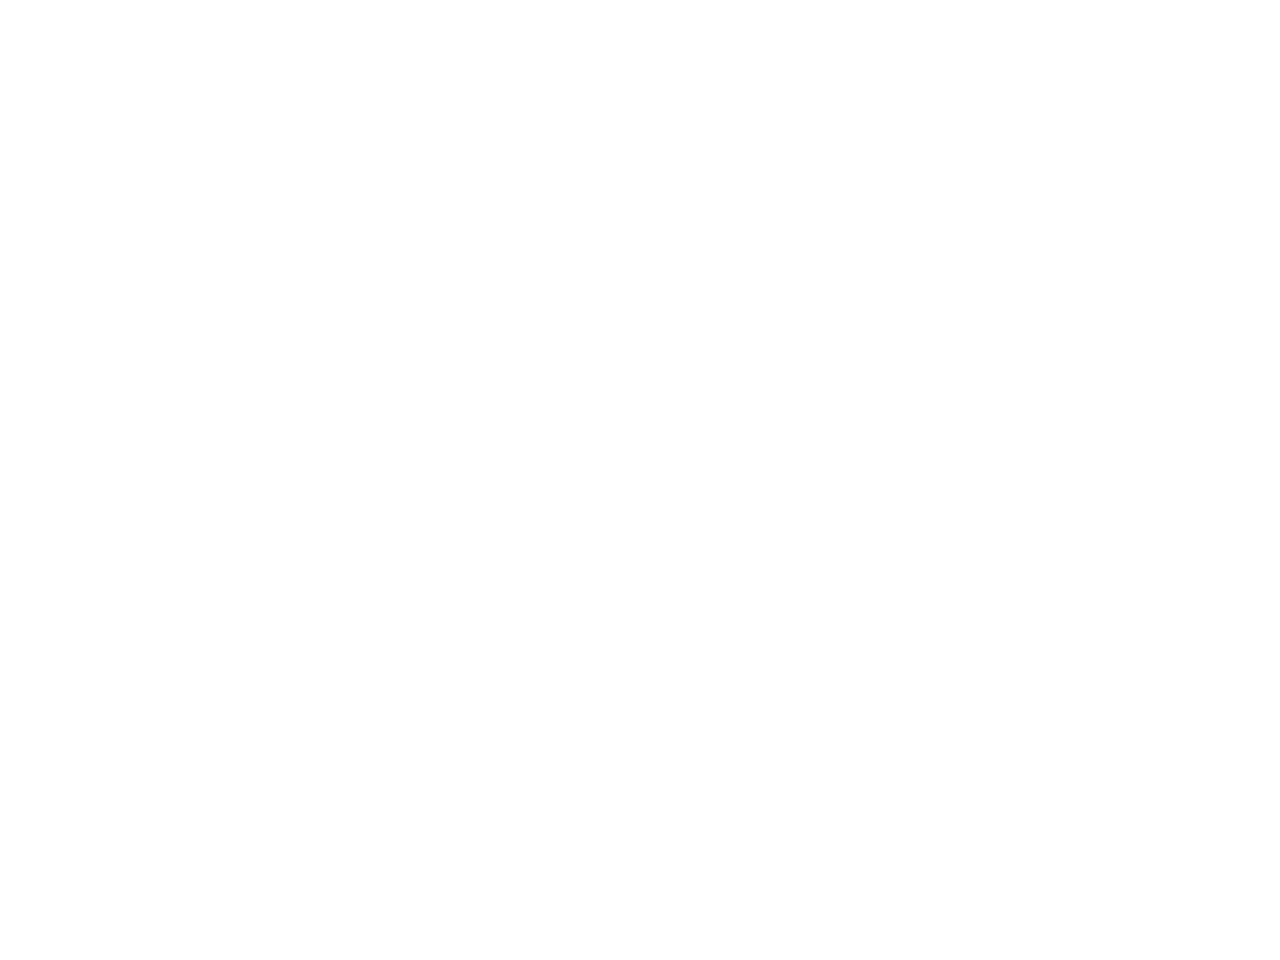

In [2]:
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


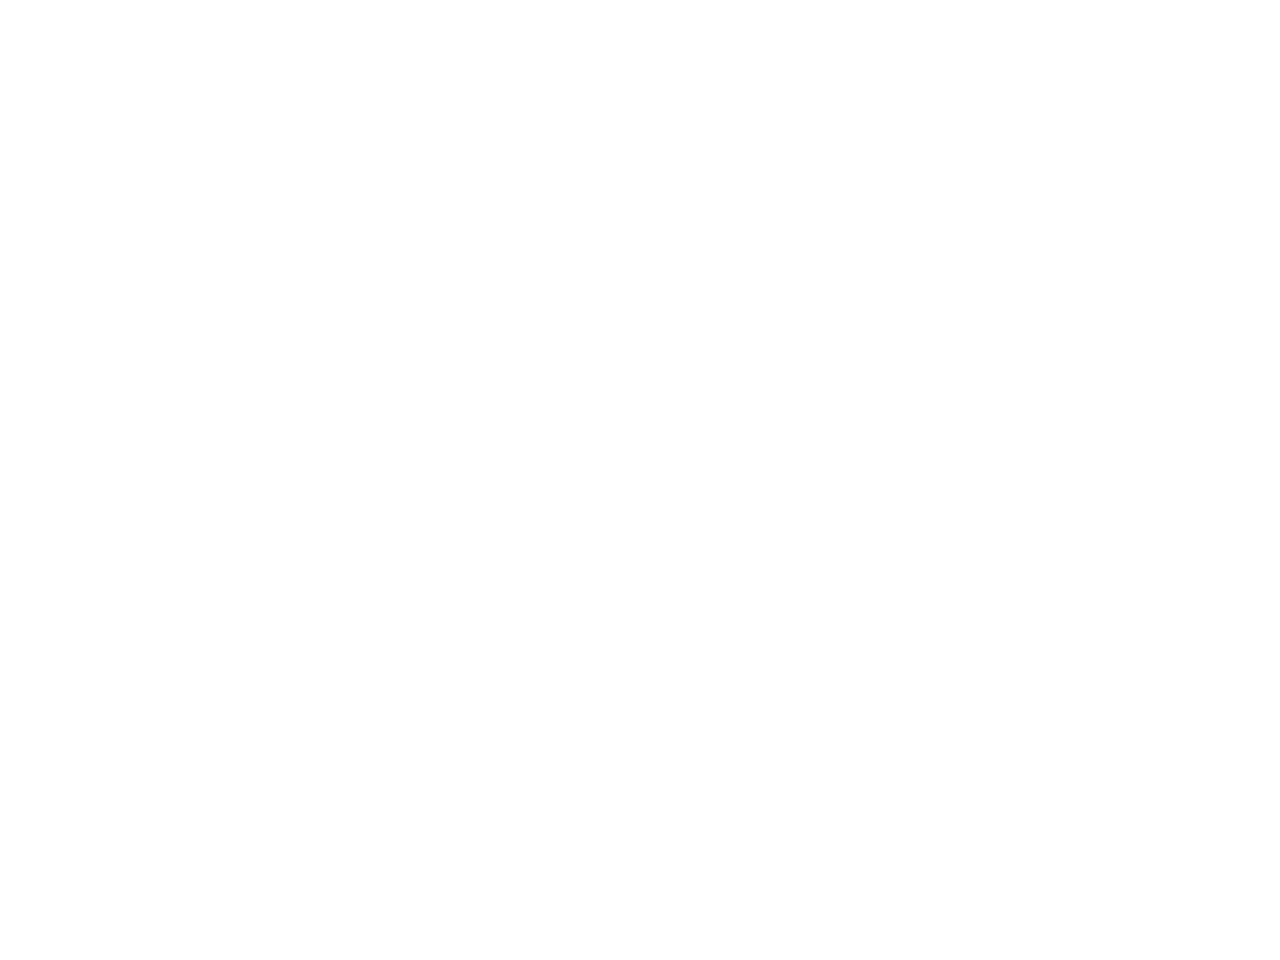

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


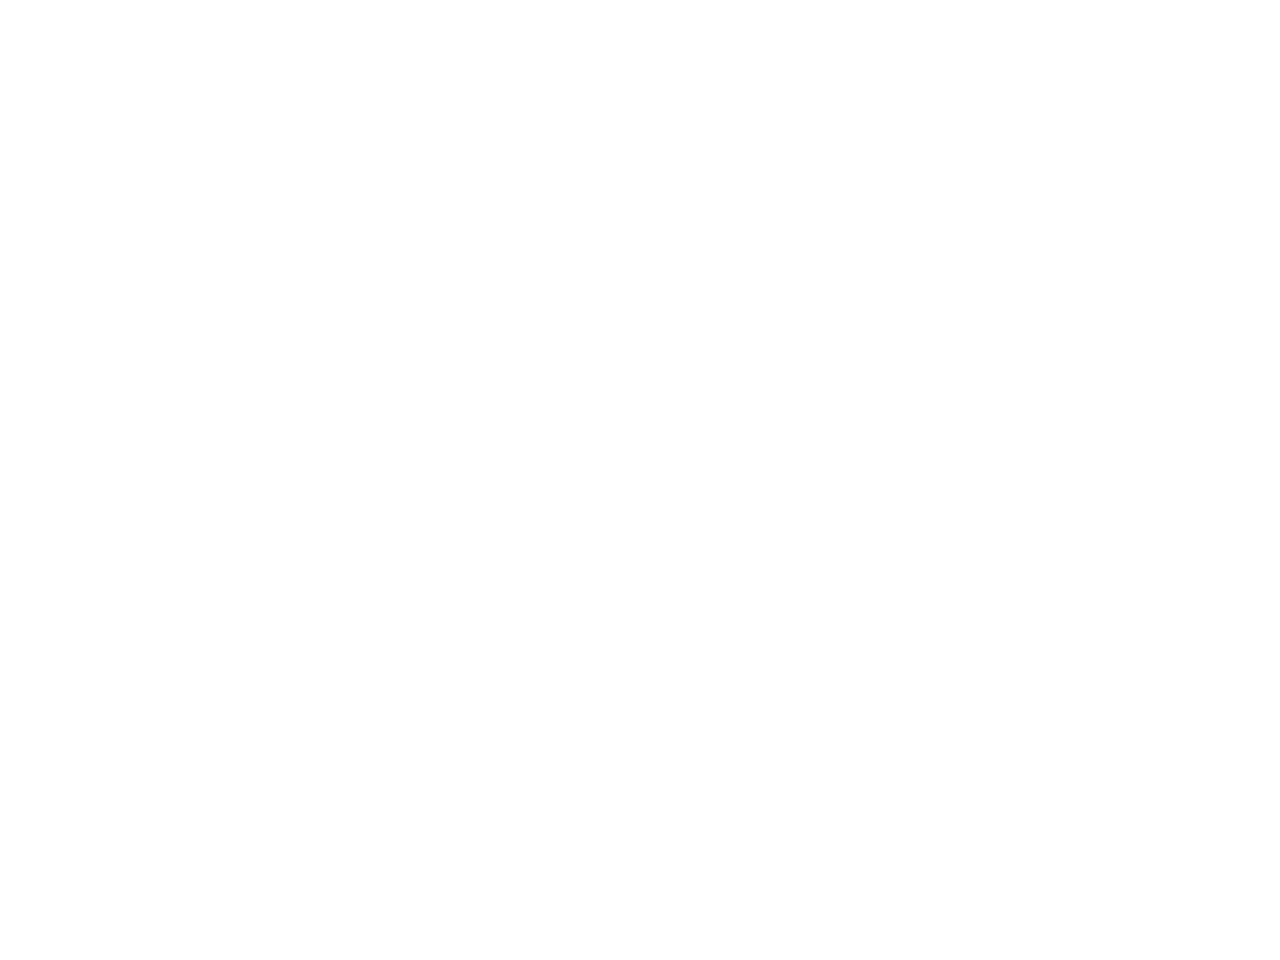

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') # draw on the last figure and subplot used (creating one if necessary)

_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


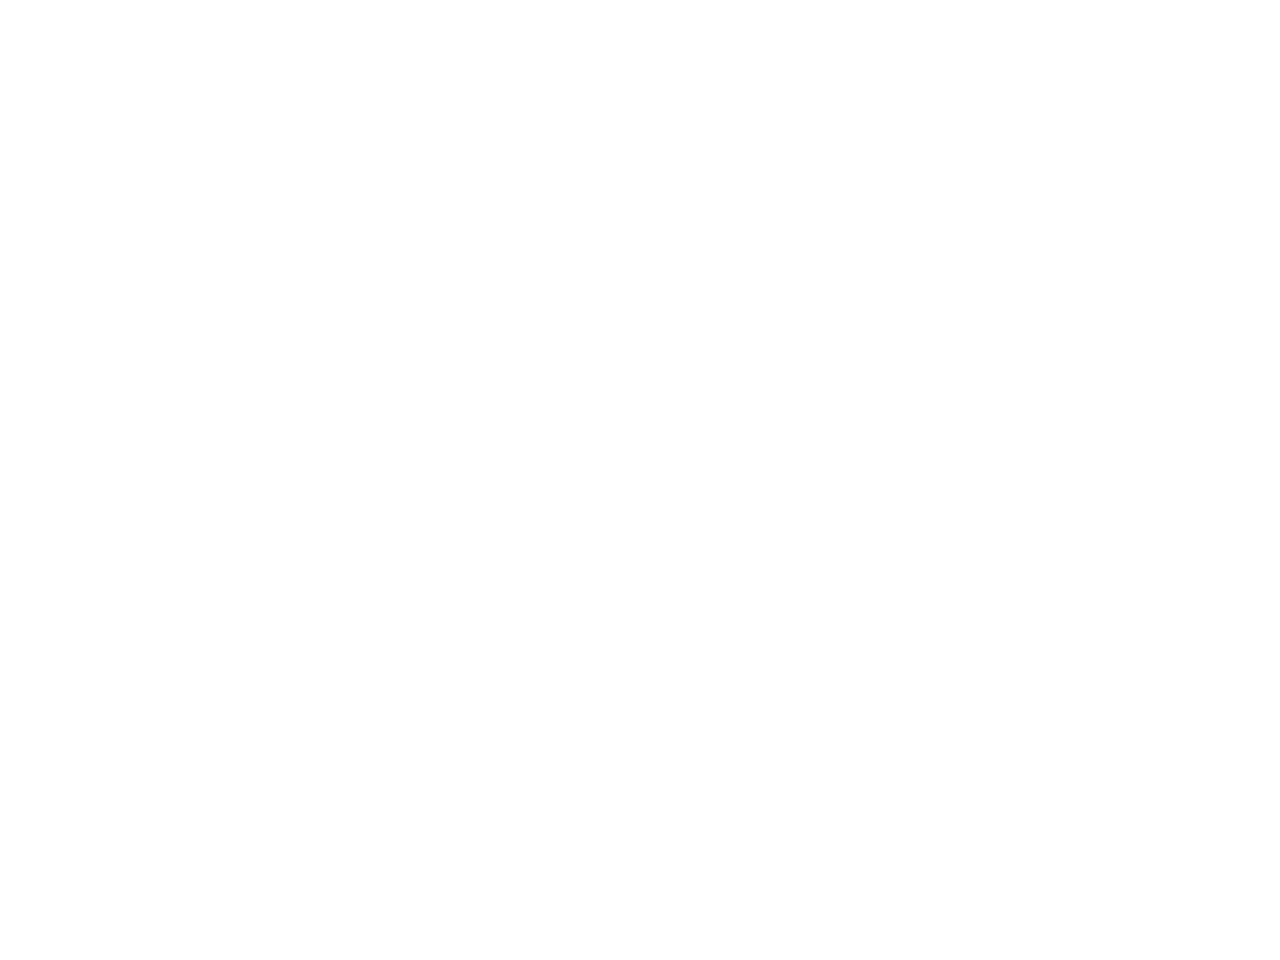

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b3b8748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b5a3cf8>]], dtype=object)

In [5]:
fig, axes = plt.subplots(2, 3) # convenience method
axes

#### Adjusting the spacing around subplots

<IPython.core.display.Javascript object>


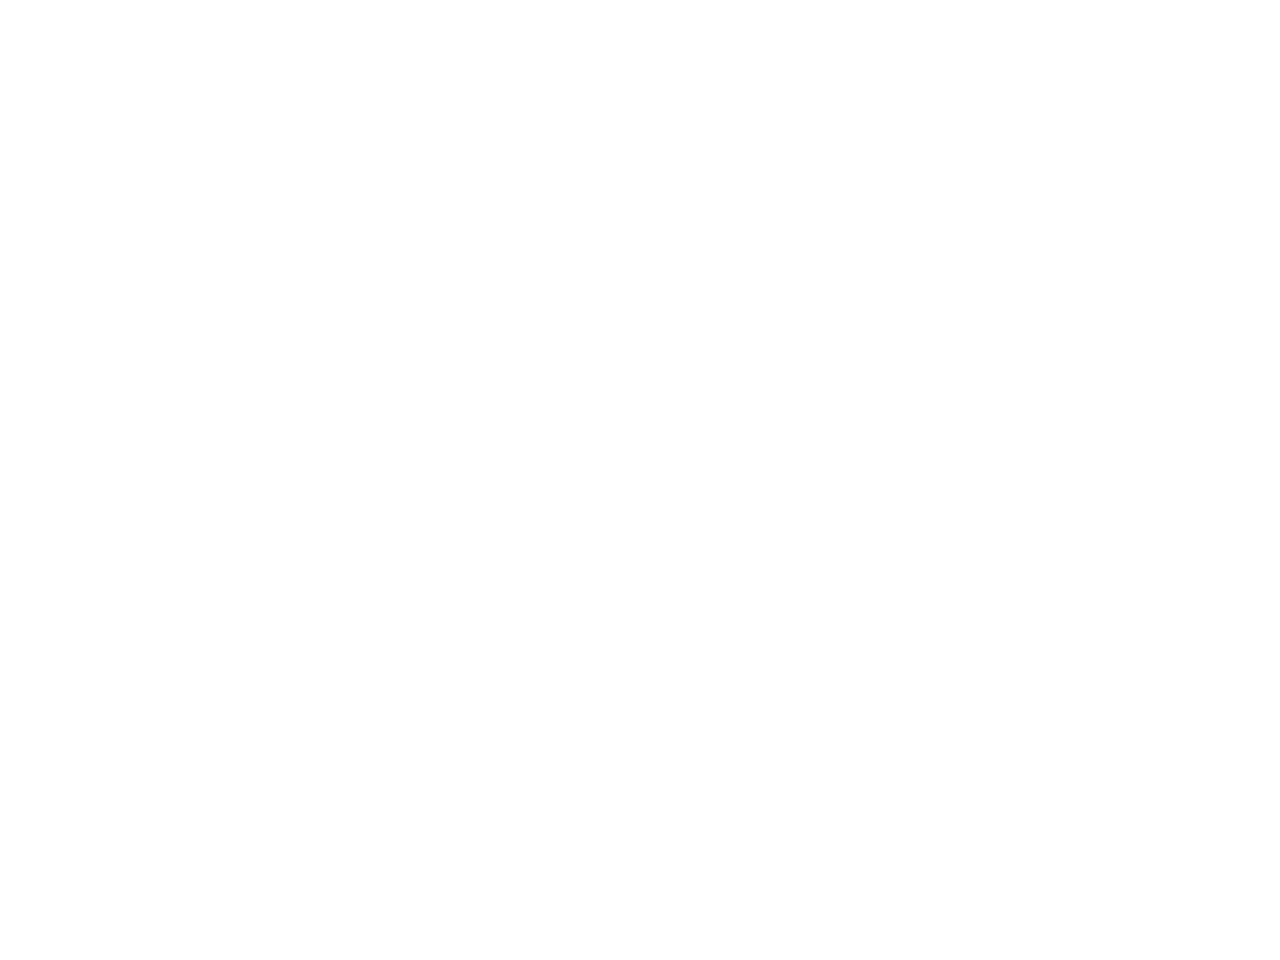

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)


### Colors, Markers, and Line Styles

In [7]:
plt.plot?

<IPython.core.display.Javascript object>


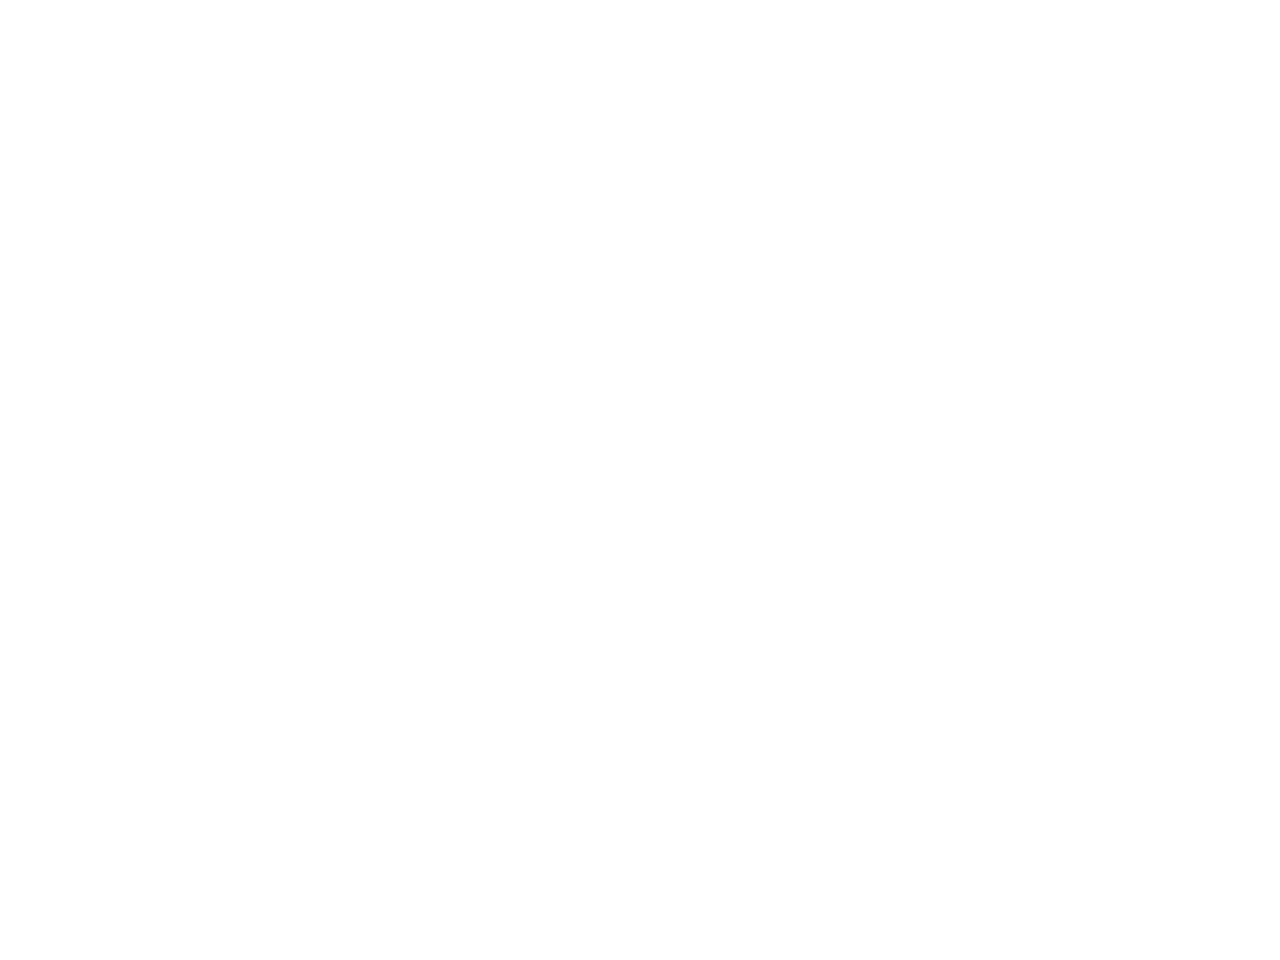

In [8]:
from numpy.random import randn
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--') # 'o' here is for markers

<IPython.core.display.Javascript object>


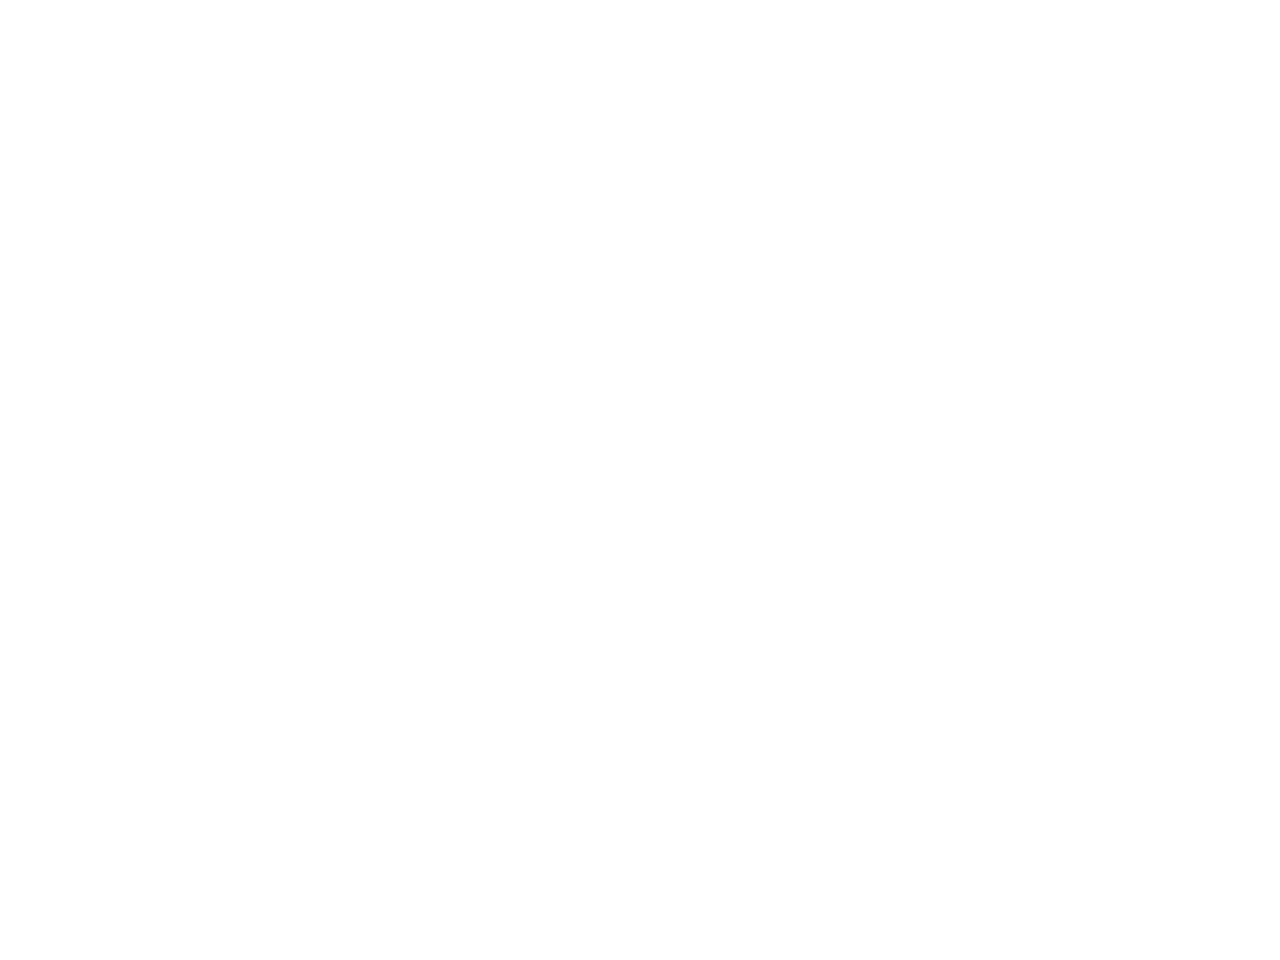

In [9]:
# written more explicitly:
plt.figure()
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


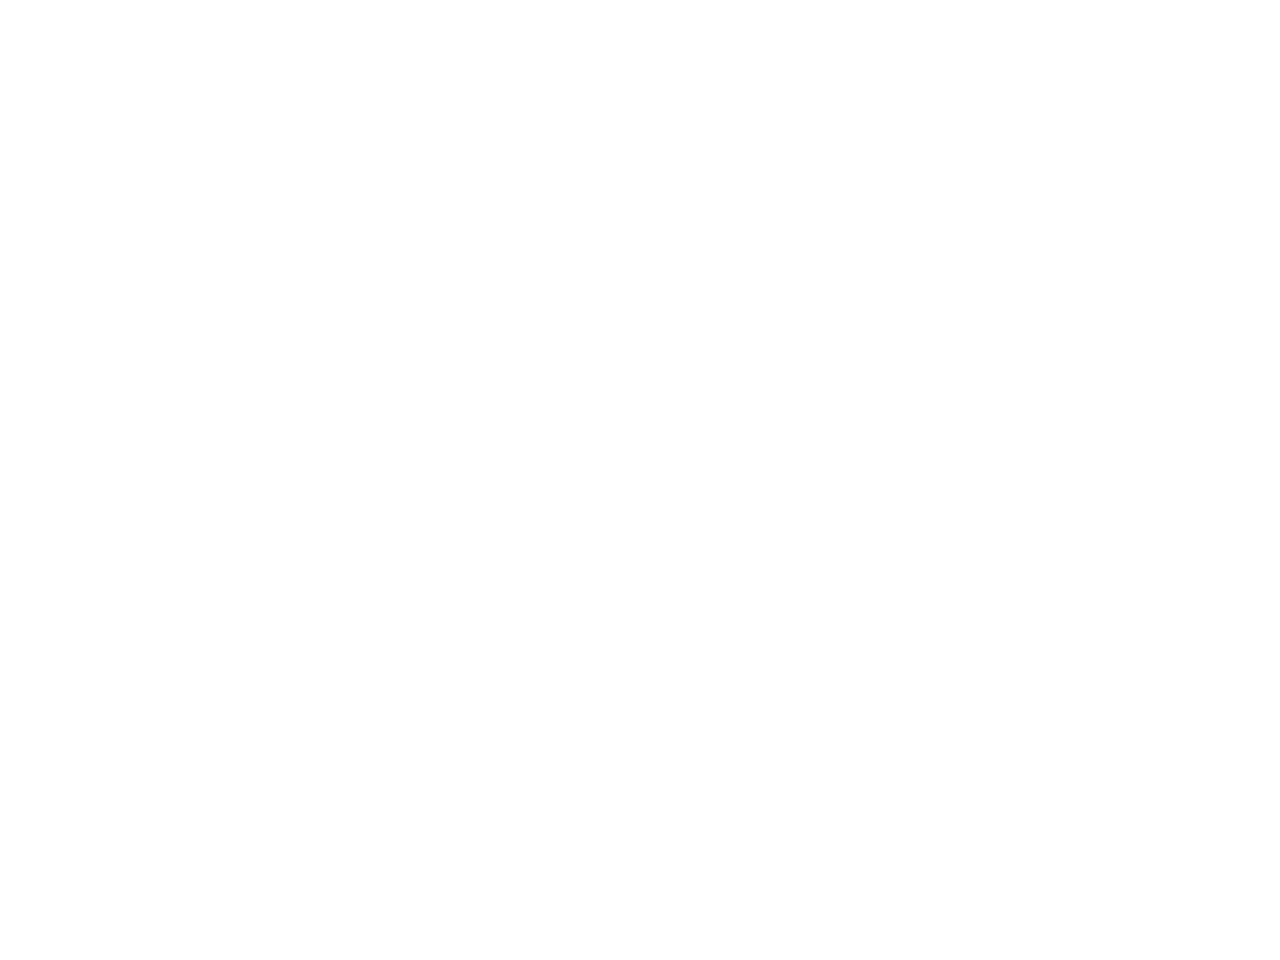

In [10]:
data = randn(30).cumsum()

plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


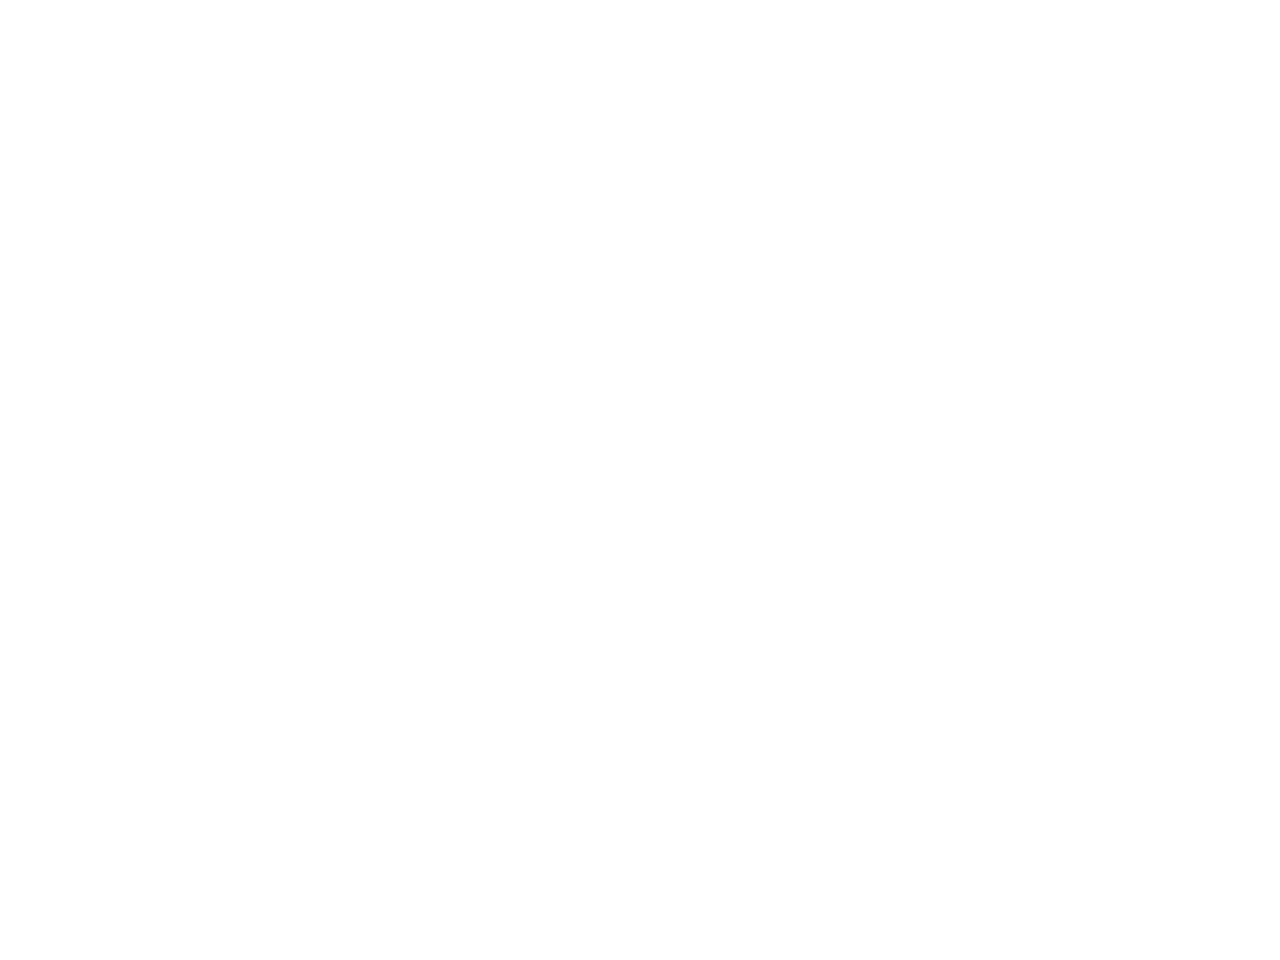

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

<IPython.core.display.Javascript object>


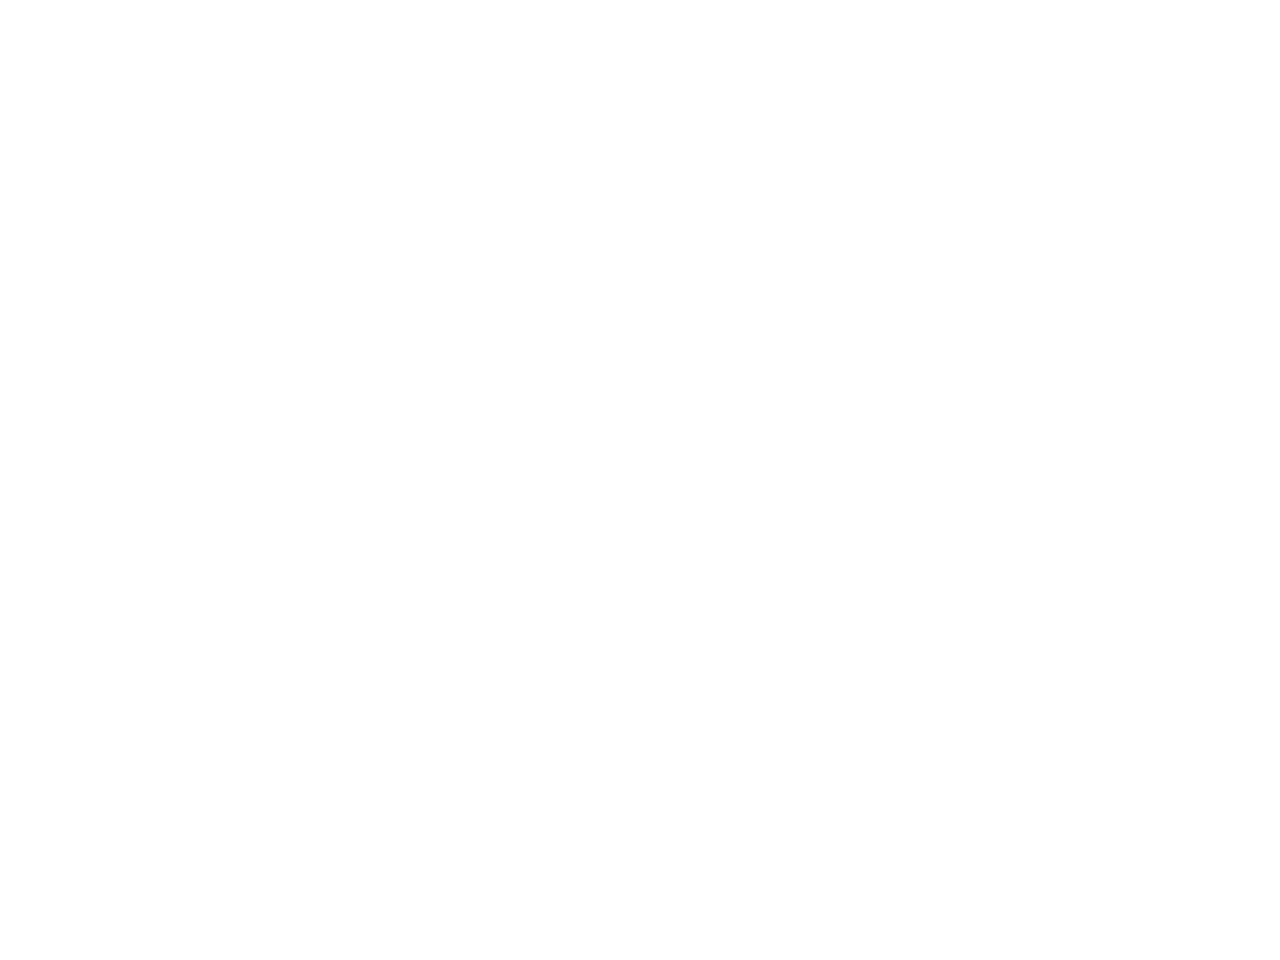

In [12]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

#### Adding legends

<IPython.core.display.Javascript object>


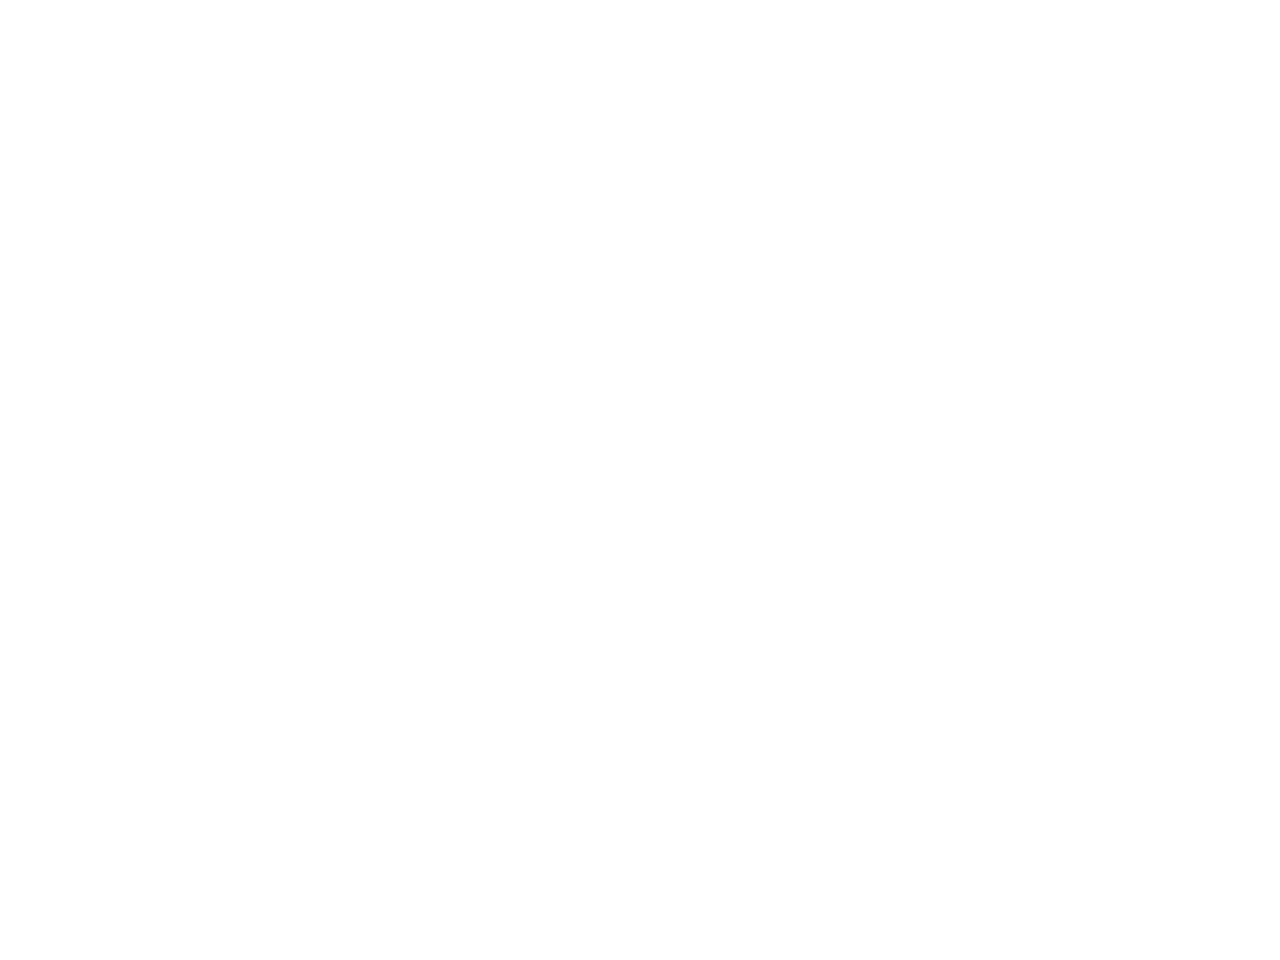

In [13]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

<IPython.core.display.Javascript object>


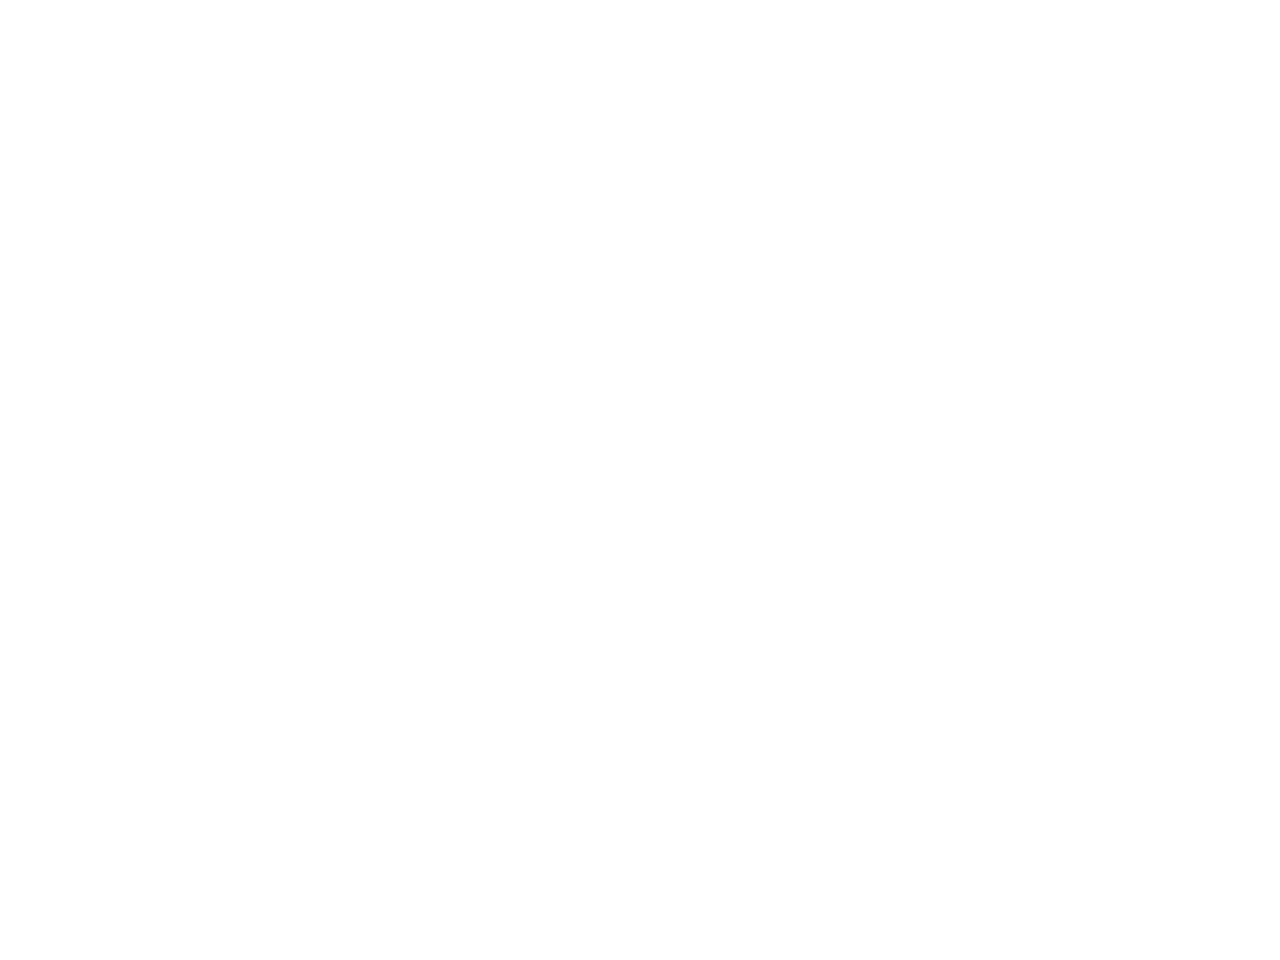

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [14]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of the bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


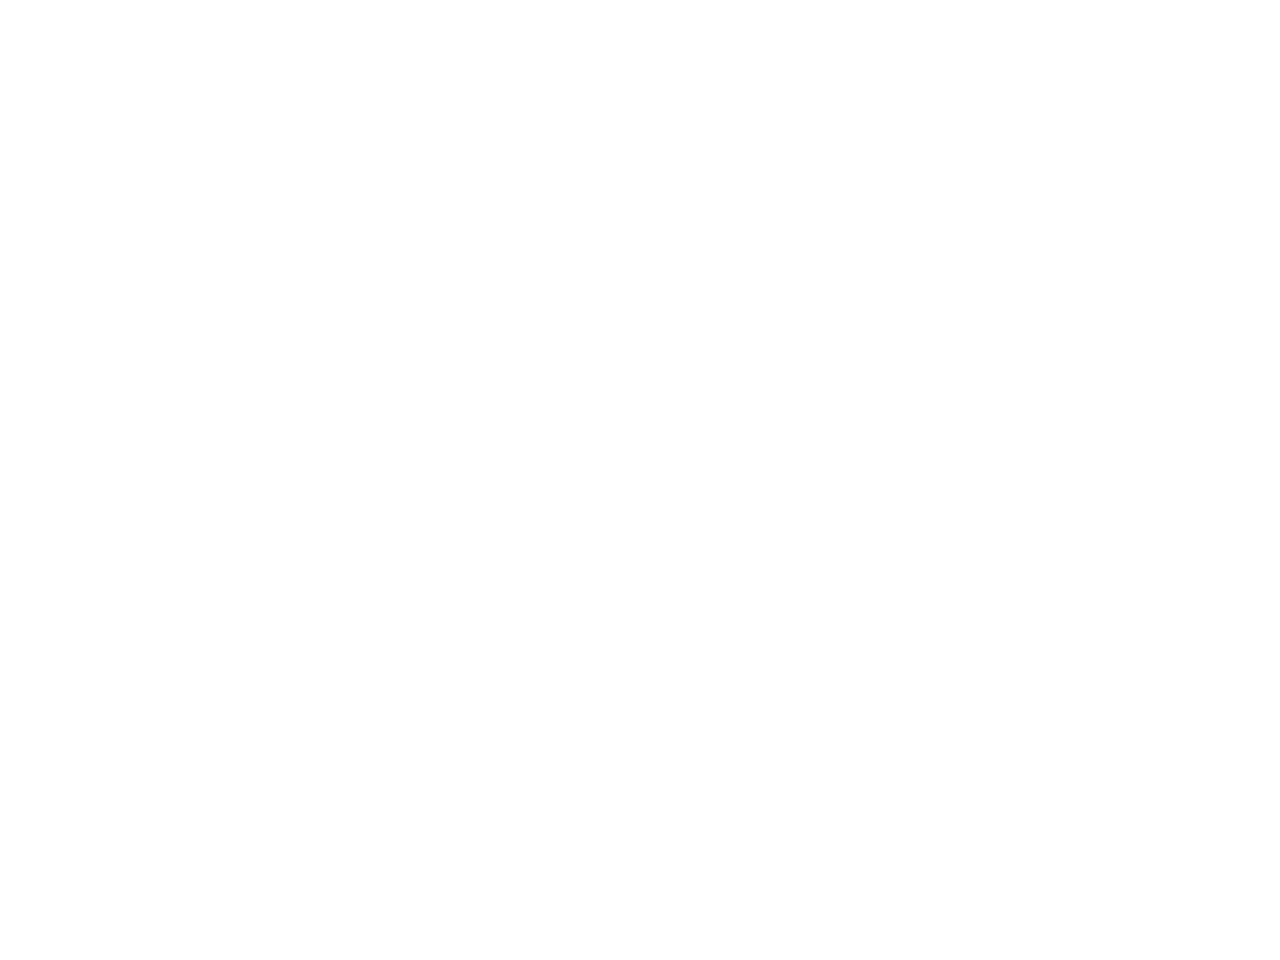

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [16]:
plt.savefig('figpath.svg')

In [17]:
plt.savefig('figpath_tight.svg', dpi=400, bbox_inches='tight')

In [18]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### `matplotlib` Configuration

In [19]:
# set the global default figure size to be 10x10
%matplotlib inline

plt.rc('figure', figsize=(12, 8))

In [20]:
# font_options = {'family': 'monospace',
#                 'weight': 'bold',
#                 'size': 12}
# plt.rc('font', **font_options)

## 9.2 Plotting with pandas and seaborn

### Line Plots

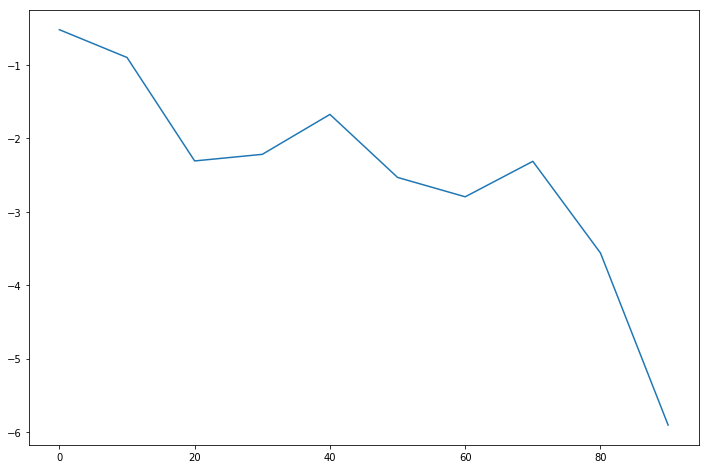

In [21]:

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

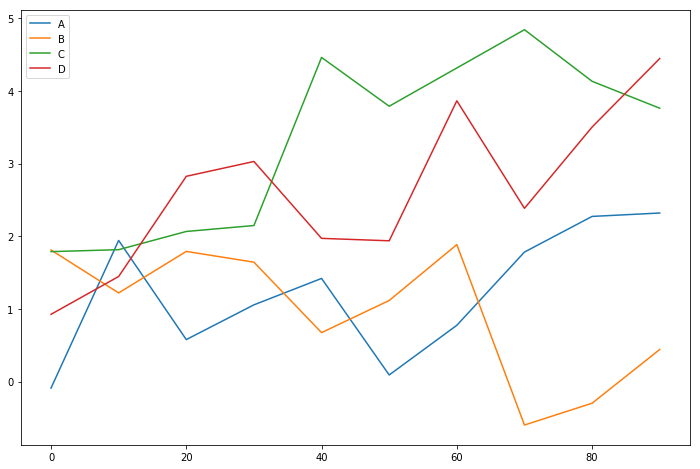

In [22]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=list('ABCD'),
                  index=np.arange(0, 100, 10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10dab7048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ddf6780>], dtype=object)

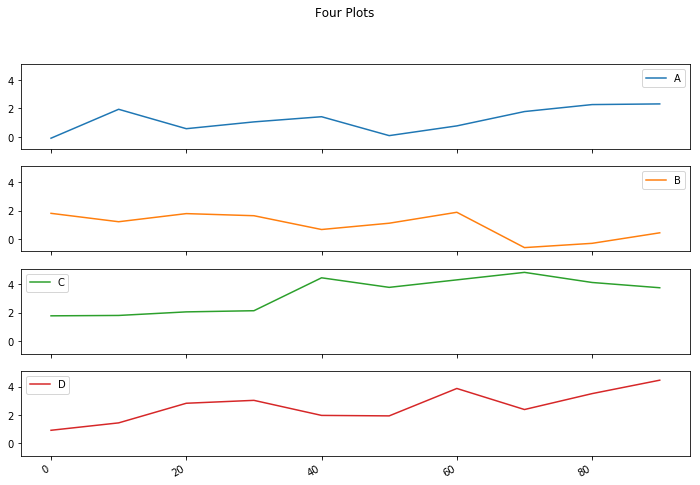

In [23]:
df.plot(subplots=True, sharey=True, title='Four Plots')

### Bar Plots

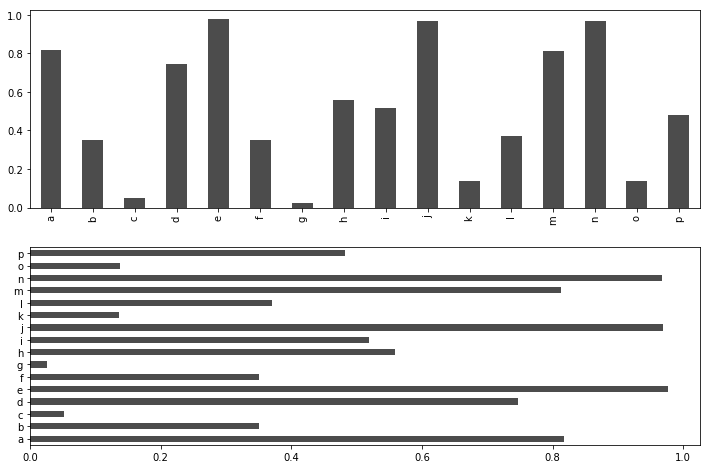

In [24]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [25]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(list('ABCD'), name='Genus'))
df

Genus,A,B,C,D
one,0.868916,0.974528,0.026503,0.875946
two,0.070898,0.382466,0.305311,0.298114
three,0.082173,0.535678,0.220447,0.706036
four,0.483451,0.171346,0.003871,0.955554
five,0.991883,0.915102,0.992589,0.881529
six,0.331410,0.111485,0.439913,0.016317


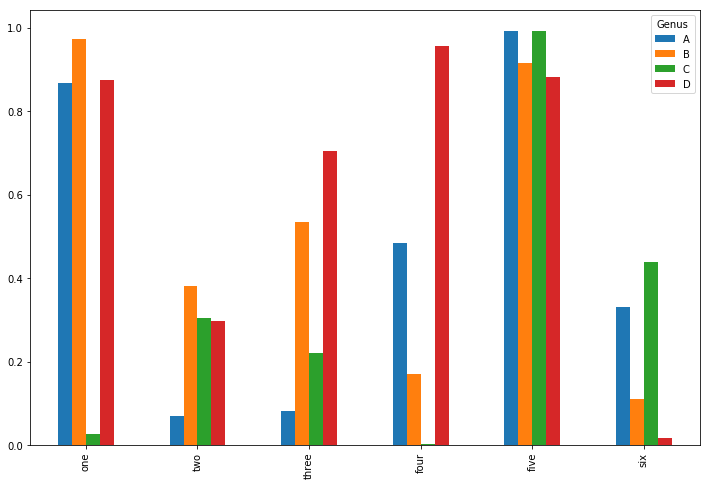

In [26]:
df.plot.bar()

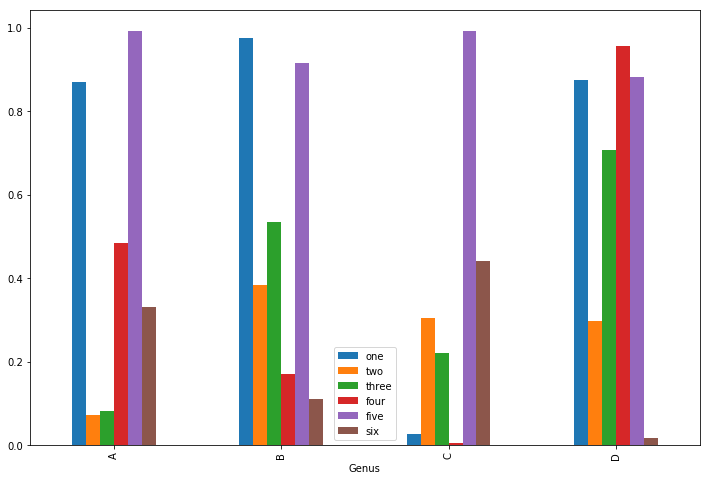

In [27]:
df.T.plot.bar()

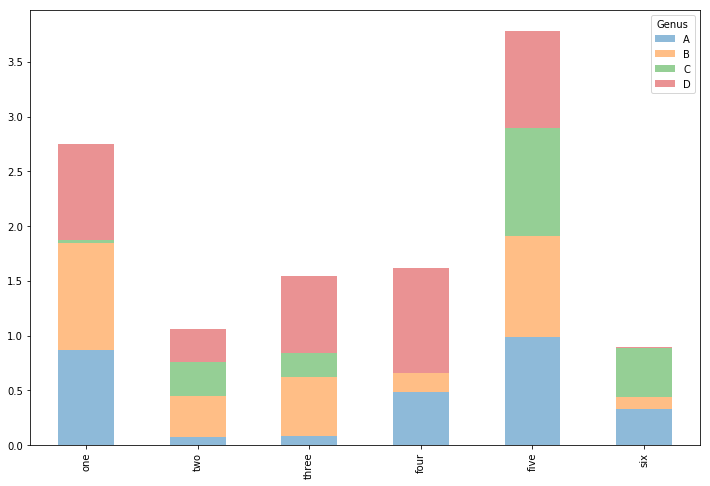

In [28]:
df.plot.bar(stacked=True, alpha=0.5)

In [29]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [32]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [39]:
party_pcts = party_counts.div(party_counts.sum(1), axis='index')
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


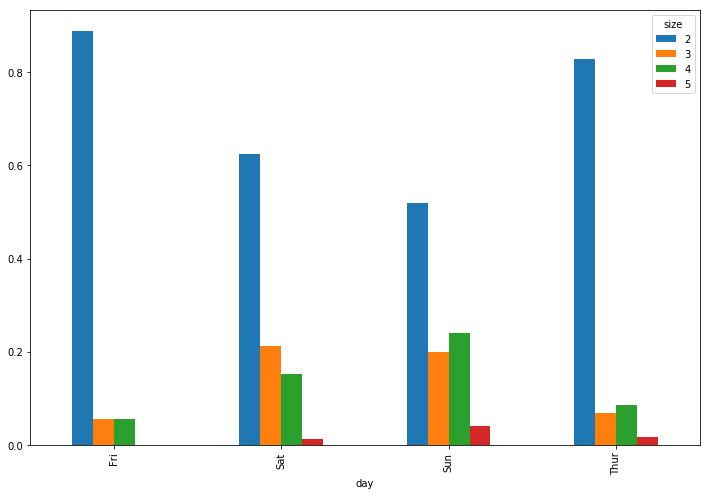

In [40]:
party_pcts.plot.bar()

In [42]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


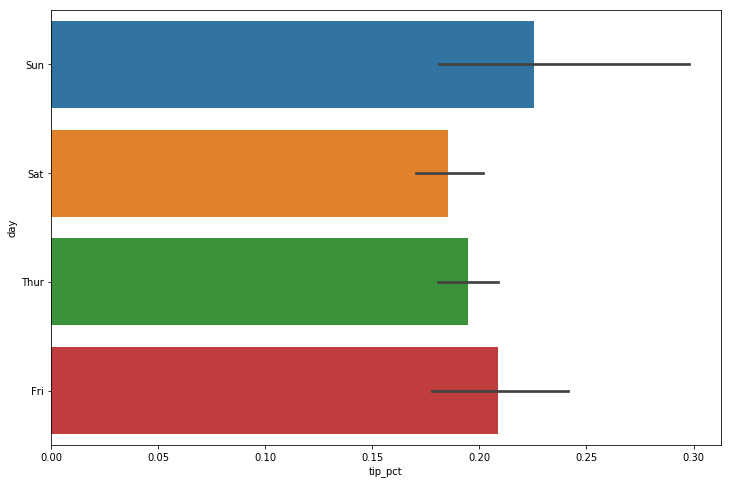

In [43]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

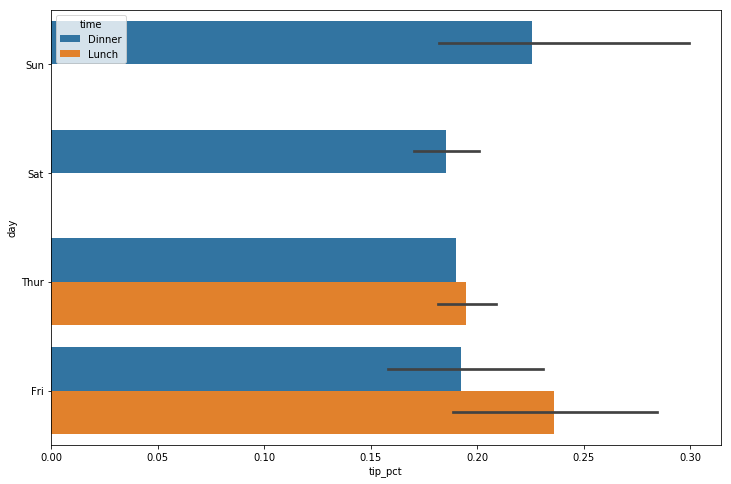

In [44]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots

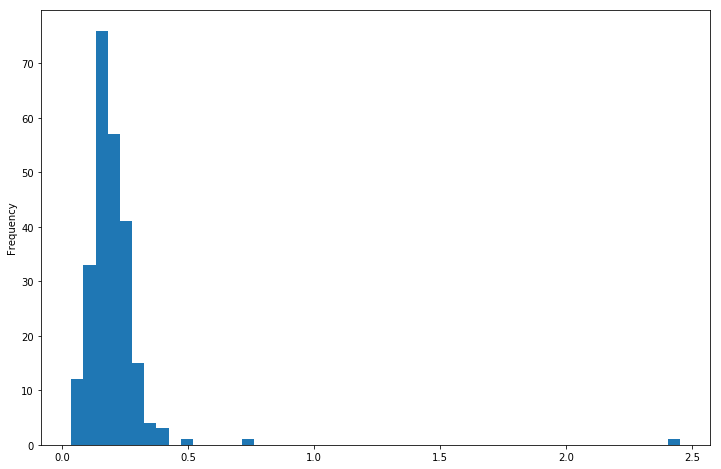

In [45]:
tips['tip_pct'].plot.hist(bins=50)

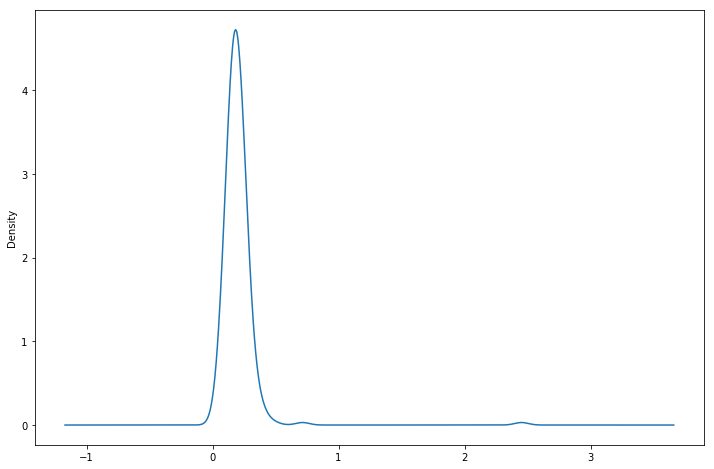

In [46]:
tips['tip_pct'].plot.density()

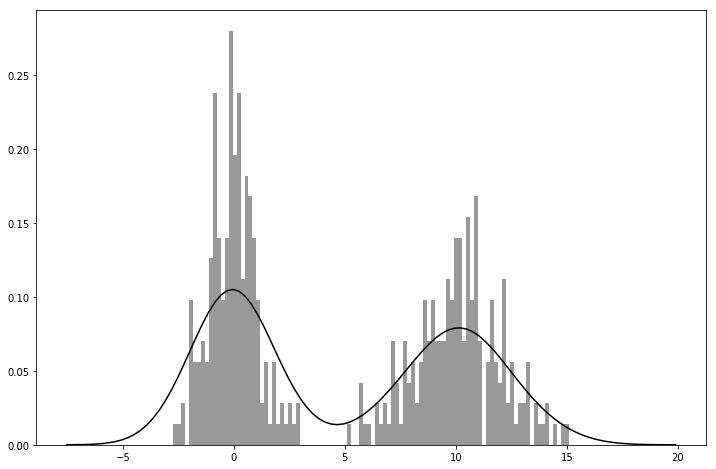

In [50]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
sns.distplot(np.concatenate([comp1, comp2]), bins=100, color='k')

### Scatter or Point Plots

In [52]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

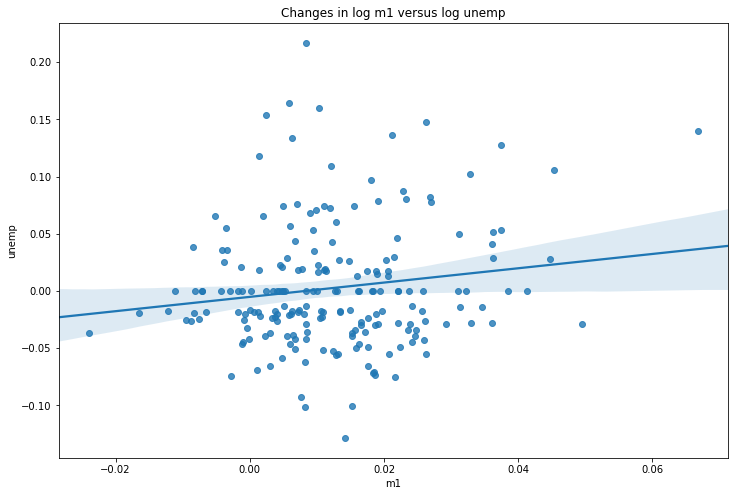

In [54]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

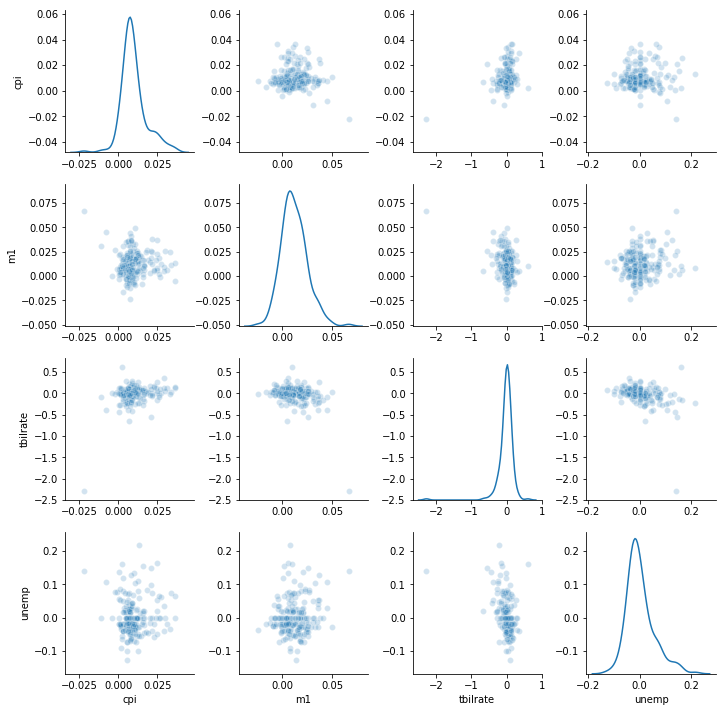

In [57]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

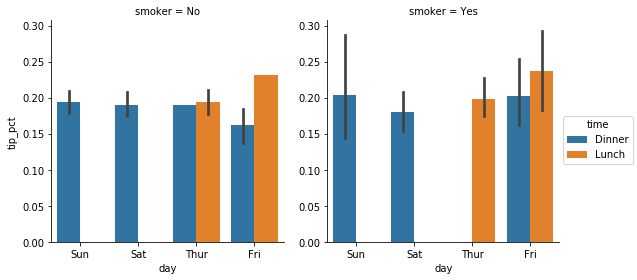

In [58]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

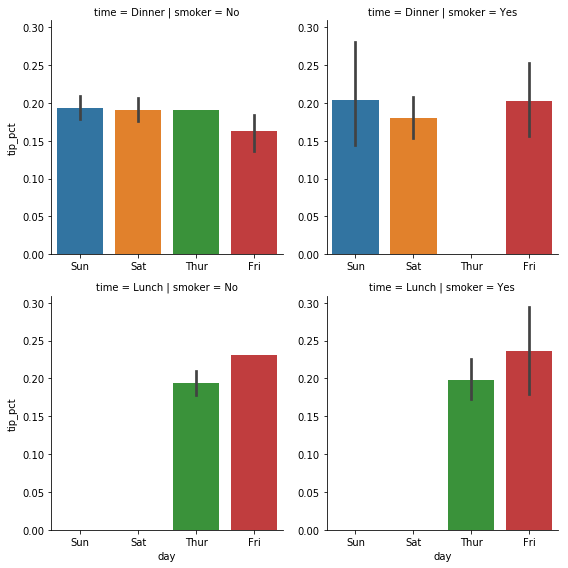

In [59]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

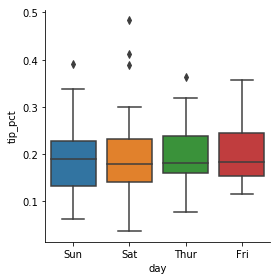

In [62]:
sns.factorplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 0.5])

## 9.3 Other Python Visualization Tools